# KNN - Credit Card Fraud Detection

---

## Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

---

## Datasets preparation

In [2]:
path = '../DataSet/'

datasets = {
    "original": {
        "X_train": path + 'original-dataset/train/X.csv', "y_train": path + 'original-dataset/train/y.csv',
        "X_test": path + 'original-dataset/test/X.csv', "y_test": path + 'original-dataset/test/y.csv'
    },
    "undersampled": {
        "X_train": path + 'undersampled-dataset/train/X.csv', "y_train": path + 'undersampled-dataset/train/y.csv',
        "X_test": path + 'undersampled-dataset/test/X.csv', "y_test": path + 'undersampled-dataset/test/y.csv'
    },
    "oversampled": {
        "X_train": path + 'oversampled-dataset/train/X.csv', "y_train": path + 'oversampled-dataset/train/y.csv',
        "X_test": path + 'oversampled-dataset/test/X.csv', "y_test": path + 'oversampled-dataset/test/y.csv'
    }
}

---

## Original dataset

In [3]:
# Training set
X_train = pd.read_csv(datasets["original"]["X_train"])
y_train = pd.read_csv(datasets["original"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["original"]["X_test"])
y_test = pd.read_csv(datasets["original"]["y_test"])

### Scaling

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [5]:
X_train

array([[-0.33974783, -1.95144063, -1.16681856, ..., -1.6211327 ,
         0.96676   , -0.4486209 ],
       [ 4.27773998,  1.24181171, -0.15922175, ...,  1.34827683,
        -0.71311931,  0.33519183],
       [-0.0533992 ,  0.05339701, -0.92214029, ...,  1.73038298,
        -0.15212107,  0.26753092],
       ...,
       [-0.32837128, -0.31497174, -0.07400401, ..., -0.8272693 ,
        -0.29672056, -0.59571272],
       [-0.33974783, -0.14359433, -1.50291696, ...,  0.88219506,
         1.2243654 ,  1.01984233],
       [ 0.09364469, -0.38688453,  0.62962541, ..., -0.81609192,
         0.0044092 ,  0.11724428]], shape=(199364, 30))

### Hyperparam tuning with GridSearchCV

In [6]:
if os.path.exists('grid_search_knn_original.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_knn_original.pkl')

else:
    print("Performing grid search for KNN on original dataset...")
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['distance'],
        'metric': ['euclidean', 'manhattan']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_knn_original.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.8422045130442077
Best estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')


### Evaluation on test set

c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS-Credit-card-fraud-detection\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS-Credit-card-fraud-detection\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.73      0.80       136

    accuracy                           1.00     85443
   macro avg       0.94      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Test ROC AUC Score: 0.9042846287353841
Test Confusion Matrix:
[[85294    13]
 [   37    99]]


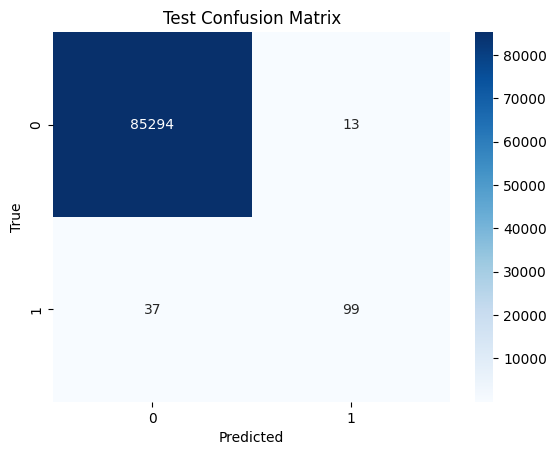

In [7]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Undersampled dataset

In [8]:
# Training set
X_train = pd.read_csv(datasets["undersampled"]["X_train"])
y_train = pd.read_csv(datasets["undersampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["undersampled"]["X_test"])
y_test = pd.read_csv(datasets["undersampled"]["y_test"])

# Original test set
X_test_ori = pd.read_csv(datasets["original"]["X_test"])
y_test_ori = pd.read_csv(datasets["original"]["y_test"])

### Hyperparam tuning with GridSearchCV

In [9]:
if os.path.exists('grid_search_knn_undersampled.pkl'):
    print("Loading existing grid search results for undersampled dataset...")
    grid = joblib.load('grid_search_knn_undersampled.pkl')

else:
    print("Performing grid search for undersampled dataset...")
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['distance'],
        'metric': ['euclidean', 'manhattan']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_knn_undersampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results for undersampled dataset...
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9376818013296122
Best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


### Evaluation on undersampled test set

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       150
           1       0.95      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Test ROC AUC Score: 0.9703196347031963
Test Confusion Matrix:
[[143   7]
 [ 14 132]]


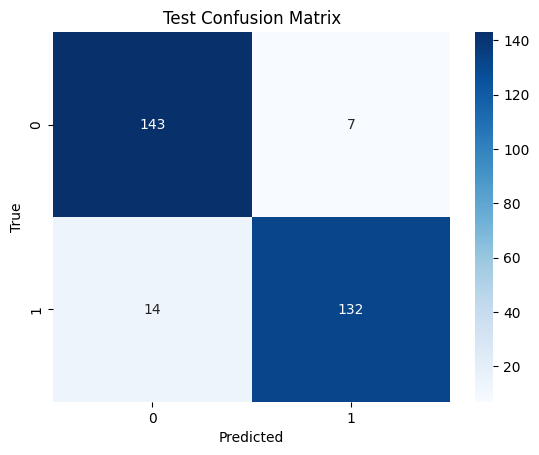

In [10]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Evaluation on original test set

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.05      0.98      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.97      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Test ROC AUC Score: 0.9879251857822854
Test Confusion Matrix:
[[82595  2712]
 [    3   133]]


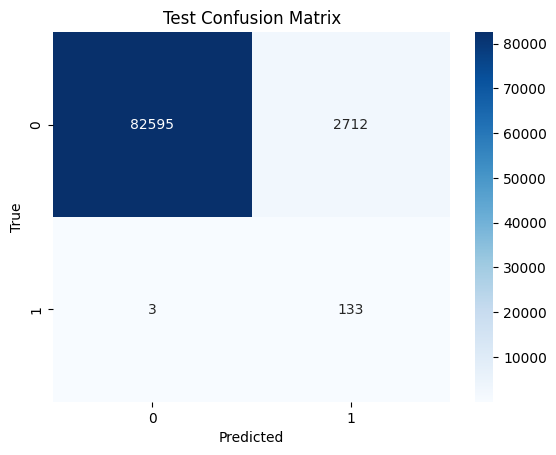

In [11]:
y_test_pred = best_estimator.predict(X_test_ori)
y_test_pred_proba = best_estimator.predict_proba(X_test_ori)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test_ori, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test_ori, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test_ori, y_test_pred))
sns.heatmap(confusion_matrix(y_test_ori, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Oversampled dataset

In [12]:
# Training set
X_train = pd.read_csv(datasets["oversampled"]["X_train"])
y_train = pd.read_csv(datasets["oversampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["oversampled"]["X_test"])
y_test = pd.read_csv(datasets["oversampled"]["y_test"])

### Scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[-0.40252193, -1.78801326, -0.03953088, ..., -1.82911531,
         0.31612824, -0.46003976],
       [ 4.65847268,  1.43853484,  0.34440412, ...,  1.36234378,
        -0.40930151,  0.14909356],
       [-0.08866969,  0.23772864,  0.0537014 , ...,  1.77302346,
        -0.16704315,  0.09651146],
       ...,
       [-0.40044289, -1.06346102,  0.61912474, ..., -0.38503739,
        -0.0773115 , -0.0843506 ],
       [ 0.0650186 ,  1.04677553,  0.76605044, ..., -0.36974985,
        -0.12129076, -0.09511358],
       [-0.40252193, -1.4217068 , -2.36863582, ...,  1.41343418,
         2.39361909, -3.09314089]], shape=(398016, 30))

### Hyperparam tuning with GridSearchCV

In [15]:
if os.path.exists('grid_search_knn_oversampled.pkl'):
    print("Loading existing grid search results for oversampled dataset...")
    grid = joblib.load('grid_search_knn_oversampled.pkl')

else:
    print("Performing grid search for oversampled dataset...")
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['distance'],
        'metric': ['euclidean', 'manhattan']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_knn_oversampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results for oversampled dataset...
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9992292727649282
Best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


### Evaluation on test set

c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS-Credit-card-fraud-detection\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS-Credit-card-fraud-detection\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     85307
           1       0.01      0.93      0.01       136

    accuracy                           0.73     85443
   macro avg       0.50      0.83      0.43     85443
weighted avg       1.00      0.73      0.84     85443

Test ROC AUC Score: 0.8480292459276841
Test Confusion Matrix:
[[62103 23204]
 [    9   127]]


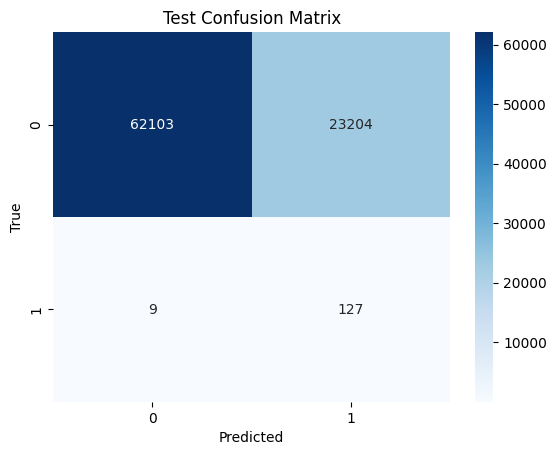

In [16]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## KNN - Results comparison

| Dataset         | Best Parameters                                              | F1-Score (Class 1) | Recall (Class 1) | Precision (Class 1) | ROC AUC | Confusion Matrix                 | Observations                                                                                   |
|-----------------|--------------------------------------------------------------|---------------------|------------------|----------------------|---------|----------------------------------|------------------------------------------------------------------------------------------------|
| **Original**     | `metric='euclidian'`, `n_neighbors=3`, `weights='distance'` | 0.80                | 0.73             | 0.88                 | 0.904   | TN=85294, FP=13, FN=37, TP=99   | Performs decently with balanced F1-score and good precision, but recall is slightly limited.   |
| **Undersampled** | `metric='manhattan'`, `n_neighbors=3`, `weights='distance'` | 0.09                | 0.98             | 0.05                 | 0.988   | TN=82595, FP=2712, FN=3, TP=133       | Achieves very high recall but at the cost of extremely low precision, indicating many false positives.                |
| **Oversampled**  | `metric='manhattan'`, `n_neighbors=3`, `weights='distance'` | 0.01                | 0.93             | 0.01                 | 0.848   | TN=62103, FP=23204, FN=9, TP=127  | Extremely low precision and F1-score despite high recall; poor overall performance due to misclassification of negatives.         |


**Global observation:**

KNN shows a strong tendency to favor recall when class imbalance is addressed, but suffers from drastic drops in precision and F1-score, particularly with oversampling, making it a risky choice for fraud detection where false positives are costly.